# Overall Results

## combine results from weak supervision from multiple runs with different random state

In [47]:
import os
from os.path import join
# from dotenv import load_dotenv
# load_dotenv(override=True)
import pandas as pd
import json
from sklearn.metrics import classification_report
import numpy as np

corpus = "public_bi"

#labeled_data_size = 5
distance_threshold = 0.01
for labeled_data_size in [1,2,3,4,5]:
    path = join("../labeling_functions","combined_LFs", "validation")
    scores = {
        "f1-scores_macro": [],
        "precisions_macro":[],
        "recalls_macro":[],
        "supports_macro": [],
        "f1-scores_weighted": [],
        "precisions_weighted": [],
        "recalls_weighted": [],
        "supports_weighted": []
    }


    for random_state in [1,2,3,4,5]:
        with open(join(path,f"{corpus}_classification_report_test_maj_{labeled_data_size}_absolute_20.0_{random_state}.json")) as f:
            current_class_report = json.load(f)
        for metric in ["macro","weighted"]:
            scores[f"f1-scores_{metric}"].append(current_class_report[f"{metric} avg"]["f1-score"])
            scores[f"precisions_{metric}"].append(current_class_report[f"{metric} avg"]["precision"])
            scores[f"recalls_{metric}"].append(current_class_report[f"{metric} avg"]["recall"])
            scores[f"supports_{metric}"].append(current_class_report[f"{metric} avg"]["support"])

    df_scores = pd.DataFrame(
        np.array([
            scores["f1-scores_macro"], scores["precisions_macro"],
            scores["recalls_macro"], scores["supports_macro"],
            scores["f1-scores_weighted"], scores["precisions_weighted"],
            scores["recalls_weighted"], scores["supports_weighted"]
        ]), index=scores.keys())
    df_scores["mean"] = df_scores.mean(axis=1)
    df_scores["std"] = df_scores.std(axis=1)
    df_scores["var"] = df_scores.var(axis=1)
    
    df_scores.to_csv(join(path,f"{corpus}_classification_report_test_maj_{labeled_data_size}_absolute_20.0_mean.csv"))

In [37]:
import pandas as pd
import os
from os.path import join

labeled_data_size = 5
random_state = 1
none_labels = []
for random_state in [1,2,3,4,5]:
    df = pd.read_csv(join("../labeling_functions","combined_LFs", "results", f"public_bi_results_test_maj_{labeled_data_size}_absolute_20.0_{random_state}.csv"))
    none_labels.append(len(df[df["predicted_semantic_type"] == "None"]))

In [38]:
sum(np.array(none_labels)/285)/5

0.36771929824561406

In [50]:
import os
from os.path import join
# from dotenv import load_dotenv
# load_dotenv(override=True)
import pandas as pd
import json
from sklearn.metrics import classification_report
import numpy as np

corpus = "turl"

#labeled_data_size = 5
distance_threshold = 0.01
for labeled_data_size in [1,2,3,4,5]:
    path = join("../labeling_functions","combined_LFs","validation")
    scores = {
        "f1-scores_macro": [],
        "precisions_macro":[],
        "recalls_macro":[],
        "supports_macro": [],
        "f1-scores_weighted": [],
        "precisions_weighted": [],
        "recalls_weighted": [],
        "supports_weighted": []
    }


    for random_state in [1,2,3,4,5]:
        with open(join(path,f"{corpus}_classification_report_test_maj_{labeled_data_size}_absolute_20.0_{random_state}.json")) as f:
            current_class_report = json.load(f)
        for metric in ["macro","weighted"]:
            scores[f"f1-scores_{metric}"].append(current_class_report[f"{metric} avg"]["f1-score"])
            scores[f"precisions_{metric}"].append(current_class_report[f"{metric} avg"]["precision"])
            scores[f"recalls_{metric}"].append(current_class_report[f"{metric} avg"]["recall"])
            scores[f"supports_{metric}"].append(current_class_report[f"{metric} avg"]["support"])

    df_scores = pd.DataFrame(
        np.array([
            scores["f1-scores_macro"], scores["precisions_macro"],
            scores["recalls_macro"], scores["supports_macro"],
            scores["f1-scores_weighted"], scores["precisions_weighted"],
            scores["recalls_weighted"], scores["supports_weighted"]
        ]), index=scores.keys())
    df_scores["mean"] = df_scores.mean(axis=1)
    df_scores["std"] = df_scores.std(axis=1)
    df_scores["var"] = df_scores.var(axis=1)
    
    df_scores.to_csv(join(path,f"{corpus}_classification_report_test_maj_{labeled_data_size}_absolute_20.0_mean.csv"))

## plot results

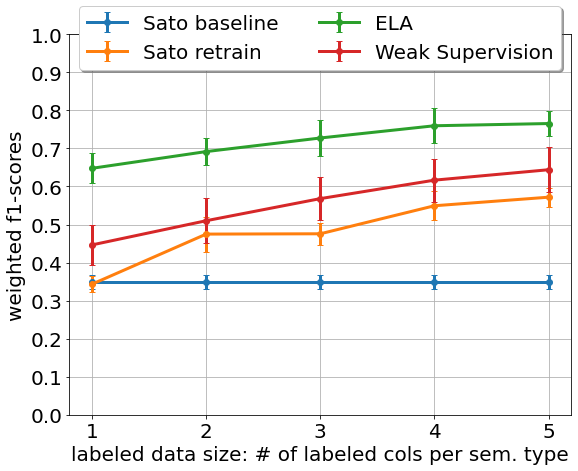

In [17]:
import os
from os.path import join
from dotenv import load_dotenv
load_dotenv(override=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

corpus = "public_bi"
metric = "f1-scores"
avg = "weighted"

os.environ["TYPENAME"] = "type78"

x_values = [1,2,3,4,5]

########## Sato Baseline
y_values_baseline = []
error_values_baseline = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], "classification_report_sato_baseline_unlabeledAbsolute_test20.0_mean.pt.csv"), index_col=0)
    y_values_baseline.append(df["mean"][f"{metric}_{avg}"])
    error_values_baseline.append(df["std"][f"{metric}_{avg}"])

########## Sato retrained with already labeled data
y_values_sato_retrained = []
error_values_sato_retrained = []
for labeled_data_size in x_values:
    df = pd.read_csv(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], f"classification_report_CRF+LDA_retrain_labeled{labeled_data_size}_unlabeledAbsolute_test20.0_mean.pt.csv"), index_col=0)
    y_values_sato_retrained.append(df["mean"][f"{metric}_{avg}"])
    error_values_sato_retrained.append(df["std"][f"{metric}_{avg}"])
    
######### Sato retrained with gen train data
y_values_sato_weakSup = []
error_values_sato_weakSup = []
for labeled_data_size in x_values:
    #df = pd.read_csv(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], f"classification_report_CRF+LDA_retrain_embclus_without_knn_0.01_labeled{labeled_data_size}_unlabeledAbsolute_test20.0_mean.pt.csv"), index_col=0)
    df = pd.read_csv(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], f"classification_report_CRF+LDA_retrain_embclus_all_combined_maj_labeled{labeled_data_size}_unlabeledAbsolute_test20.0_mean.pt.csv"), index_col=0)
    y_values_sato_weakSup.append(df["mean"][f"{metric}_{avg}"])
    error_values_sato_weakSup.append(df["std"][f"{metric}_{avg}"])
    
######### Weak Sup
y_values_weakSup = []
error_values_weakSup = []
for labeled_data_size in x_values:
    #df = pd.read_csv(join(os.environ["WORKING_DIR"], "emb_clus", "without_knn", "out", "validation", f"{corpus}_classification_report_test_0.01_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    df = pd.read_csv(join(os.environ["WORKING_DIR"], "labeling_functions", "combined_LFs", "validation", f"{corpus}_classification_report_test_maj_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    y_values_weakSup.append(df["mean"][f"{metric}_{avg}"])
    error_values_weakSup.append(df["std"][f"{metric}_{avg}"])


fontsize = 20
plt.figure(figsize=(9,7))
plt.errorbar(x_values, y_values_baseline, error_values_baseline, marker="o", capsize=3, label="Sato baseline", linewidth=3)
plt.errorbar(x_values, y_values_sato_retrained, error_values_sato_retrained, marker="o",capsize=3, label="Sato retrain", linewidth=3)
plt.errorbar(x_values, y_values_sato_weakSup, error_values_sato_weakSup, marker="o",capsize=3, label="ELA", linewidth=3)
plt.errorbar(x_values, y_values_weakSup, error_values_weakSup, marker="o",capsize=3, label="Weak Supervision", linewidth=3)
plt.yticks(np.arange(0,1.1,0.1), fontsize=fontsize)
plt.xticks(np.arange(1,6,1), fontsize=fontsize)
plt.grid()
plt.legend(loc="upper center", bbox_to_anchor=(0.5,1.1), ncol=2, fancybox=True,shadow=True, fontsize=fontsize)
#plt.title(f"Public BI ({avg})", fontsize=20)
plt.xlabel("labeled data size: # of labeled cols per sem. type", fontsize=fontsize)
plt.ylabel(f"{avg} {metric}", fontsize=fontsize)
plt.savefig(join("final_plots", f"{corpus}_overall_results_{avg}_{metric}.png"), bbox_inches='tight', dpi=100)
plt.show()

In [18]:
y_values_baseline

[0.3489232008689285,
 0.3489232008689285,
 0.3489232008689285,
 0.3489232008689285,
 0.3489232008689285]

In [19]:
y_values_sato_retrained

[0.3433250684639333,
 0.4748853643432497,
 0.4757162698994109,
 0.5493565282828874,
 0.5718613960048156]

In [20]:
y_values_sato_weakSup

[0.6477979382136778,
 0.6917388505236172,
 0.7274464120572823,
 0.7596068011907271,
 0.7654159089402122]

In [21]:
sum(np.array(y_values_sato_weakSup)-np.array(y_values_sato_retrained))/5

0.23537225678624396

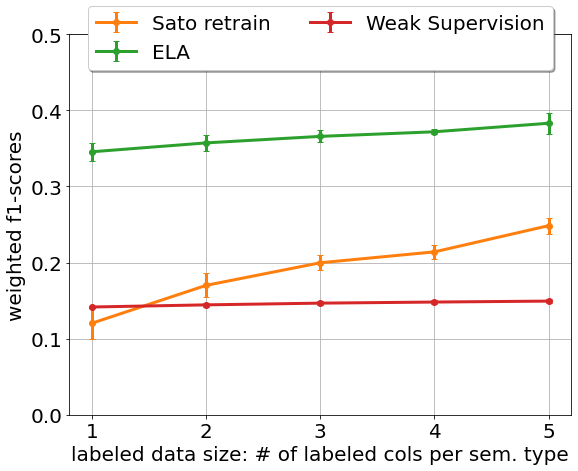

In [55]:
import os
from os.path import join
from dotenv import load_dotenv
load_dotenv(override=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

corpus = "turl"
metric = "f1-scores"
avg = "weighted"

os.environ["TYPENAME"] = "type_turl"

x_values = [1,2,3,4,5]


########## Sato retrained with already labeled data
y_values_sato_retrained = []
error_values_sato_retrained = []
for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], f"classification_report_CRF+LDA_retrain_labeled{labeled_data_size}_unlabeledAbsolute_test20.0_mean.pt.csv"), index_col=0)
    y_values_sato_retrained.append(df["mean"][f"{metric}_{avg}"])
    error_values_sato_retrained.append(df["std"][f"{metric}_{avg}"])
    # with open(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], f"CRF+LDA_eval_eval_labeled{labeled_data_size}_unlabeledAbsolute_test20.0", "outputs", f"classification_report_CRF+LDA_retrain_labeled{labeled_data_size}_unlabeledAbsolute_test20.0_train100.pt.json")) as f:
    #     report = json.load(f)
    # y_values_sato_retrained.append(report[f"{avg} avg"][f"{metric[:-1]}"])
    # error_values_sato_retrained.append(0.015)
    
######### Sato retrained with gen train data
y_values_sato_weakSup = []
error_values_sato_weakSup = []
for labeled_data_size in x_values:
    df = pd.read_csv(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], f"classification_report_CRF+LDA_retrain_embclus_all_combined_maj_labeled{labeled_data_size}_unlabeledAbsolute_test20.0_mean.pt.csv"), index_col=0)
    y_values_sato_weakSup.append(df["mean"][f"{metric}_{avg}"])
    error_values_sato_weakSup.append(df["std"][f"{metric}_{avg}"])
    
######### Weak Sup
y_values_weakSup = []
error_values_weakSup = []
for labeled_data_size in x_values:
    df = pd.read_csv(join(os.environ["WORKING_DIR"], "labeling_functions", "combined_LFs", "validation", f"{corpus}_classification_report_test_maj_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    y_values_weakSup.append(df["mean"][f"{metric}_{avg}"])
    error_values_weakSup.append(df["std"][f"{metric}_{avg}"])

fontsize = 20
plt.figure(figsize=(9,7))
#plt.errorbar(x_values, y_values_baseline, error_values_baseline, marker="o", capsize=3, label="Sato baseline")
plt.errorbar(x_values, y_values_sato_retrained, error_values_sato_retrained, color="C1", marker="o",capsize=3, label="Sato retrain", linewidth=3)
plt.errorbar(x_values, y_values_sato_weakSup, error_values_sato_weakSup, color="C2", marker="o",capsize=3, label="ELA", linewidth=3)
plt.errorbar(x_values, y_values_weakSup, error_values_weakSup, color="C3", marker="o",capsize=3, label="Weak Supervision", linewidth=3)
plt.yticks(np.arange(0,0.6,0.1), fontsize=fontsize)
plt.xticks(np.arange(1,6,1), fontsize=fontsize)
plt.grid()
plt.legend(loc="upper center", bbox_to_anchor=(0.5,1.1), ncol=2, fancybox=True,shadow=True, fontsize=fontsize)
#plt.title(f"Turl ({avg})", fontsize=20)
plt.xlabel("labeled data size: # of labeled cols per sem. type", fontsize=fontsize)
plt.ylabel(f"{avg} {metric}", fontsize=fontsize)
plt.savefig(join("final_plots", f"{corpus}_overall_results_{avg}_{metric}.png"), bbox_inches='tight', dpi=100)
plt.show()

In [270]:
y_values_sato_retrained

[0.06053181808920414,
 0.09705568572882613,
 0.12351284204641452,
 0.13981529060253226,
 0.15585986667370122]

In [271]:
y_values_sato_weakSup

[0.18581859121858546,
 0.2257665180785033,
 0.25532132401591323,
 0.26632157293359104,
 0.2860685012623677]

# Quality and number of generated training data

## combine results of multiple runs with diff. random states

In [43]:
import os
from os.path import join
# from dotenv import load_dotenv
# load_dotenv(override=True)
import pandas as pd
import json
from sklearn.metrics import classification_report
import numpy as np

corpus = "turl"

#labeled_data_size = 5
distance_threshold = 0.01
for labeled_data_size in [1,2,3,4,5]:
    path = join("../labeling_functions","combined_LFs","validation")
    scores = {
        "f1-scores_macro": [],
        "precisions_macro":[],
        "recalls_macro":[],
        "supports_macro": [],
        "f1-scores_weighted": [],
        "precisions_weighted": [],
        "recalls_weighted": [],
        "supports_weighted": []
    }


    for random_state in [1,2,3,4,5]:
        with open(join(path,f"{corpus}_classification_report_unlabeled_maj_{labeled_data_size}_absolute_20.0_{random_state}.json")) as f:
            current_class_report = json.load(f)
        for metric in ["macro","weighted"]:
            scores[f"f1-scores_{metric}"].append(current_class_report[f"{metric} avg"]["f1-score"])
            scores[f"precisions_{metric}"].append(current_class_report[f"{metric} avg"]["precision"])
            scores[f"recalls_{metric}"].append(current_class_report[f"{metric} avg"]["recall"])
            scores[f"supports_{metric}"].append(current_class_report[f"{metric} avg"]["support"])

    df_scores = pd.DataFrame(
        np.array([
            scores["f1-scores_macro"], scores["precisions_macro"],
            scores["recalls_macro"], scores["supports_macro"],
            scores["f1-scores_weighted"], scores["precisions_weighted"],
            scores["recalls_weighted"], scores["supports_weighted"]
        ]), index=scores.keys())
    df_scores["mean"] = df_scores.mean(axis=1)
    df_scores["std"] = df_scores.std(axis=1)
    df_scores["var"] = df_scores.var(axis=1)
    
    df_scores.to_csv(join(path,f"{corpus}_classification_report_unlabeled_maj_{labeled_data_size}_absolute_20.0_mean.csv"))

## plot the results

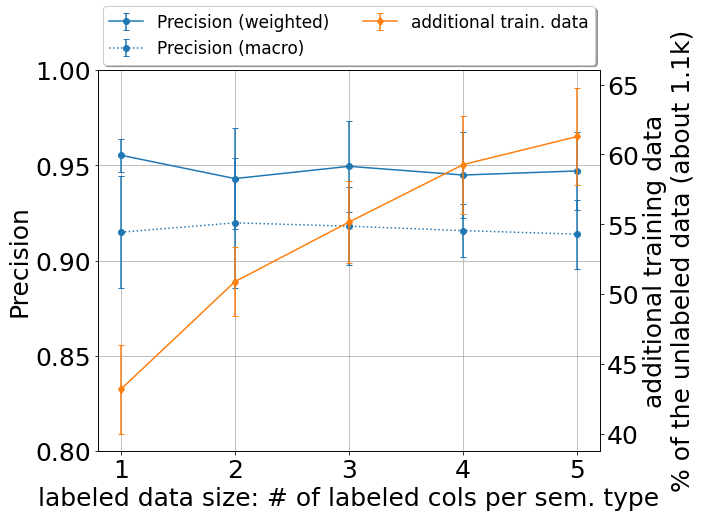

In [44]:

import os
from os.path import join
from dotenv import load_dotenv
load_dotenv(override=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

corpus = "public_bi"

if corpus == "turl":
    title = "Turl"
else:
    title = "Public BI"
    

x_values = [1,2,3,4,5]

unlabeled_data_sizes = []
###### Load number of unlabeled data
for labeled_data_size in x_values:
    if corpus== "turl":
        with open(f"../data/extract/out/labeled_unlabeled_test_split/turl_time.event/{corpus}_{labeled_data_size}_absolute_20.0_1.json") as f:
            unlabeled_data_sizes.append(len(json.load(f)[f"unlabeled"]))
    else:
        with open(f"../data/extract/out/labeled_unlabeled_test_split/{corpus}_{labeled_data_size}_absolute_20.0_1.json") as f:
            unlabeled_data_sizes.append(len(json.load(f)[f"unlabeled"]))
        


y_values_precision_weighted = []
error_values_precision_weighted = []
y_values_precision_macro = []
error_values_precision_macro = []
y_values_support = []
error_values_support = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../labeling_functions","combined_LFs","validation", f"{corpus}_classification_report_unlabeled_maj_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_values_precision_weighted.append(df["mean"][f"precisions_weighted"])
    error_values_precision_weighted.append(df["std"][f"precisions_weighted"])
    
    y_values_precision_macro.append(df["mean"][f"precisions_macro"])
    error_values_precision_macro.append(df["std"][f"precisions_macro"])
    
    y_values_support.append(df["mean"][f"supports_weighted"])
    error_values_support.append(df["std"][f"supports_weighted"])

fontsize = 25
fig, ax1 = plt.subplots(figsize=(9,7))

lns1 = ax1.errorbar(x_values, y_values_precision_weighted, error_values_precision_weighted, marker="o", color="C0", capsize=3, label="Precision (weighted)")
lns2 = ax1.errorbar(x_values, y_values_precision_macro, error_values_precision_macro, marker="o", color="C0", linestyle="dotted",capsize=3, label="Precision (macro)")

plt.yticks(np.arange(0.8,1.01,0.05), fontsize=fontsize)
plt.xticks(np.arange(1,6,1), fontsize=fontsize)
plt.grid()
#plt.legend(loc=1,fontsize=17)
#plt.title(f"{title}", fontsize=20)
plt.xlabel("labeled data size: # of labeled cols per sem. type", fontsize=fontsize)
plt.ylabel(f"Precision", fontsize=fontsize)
ax2 = ax1.twinx()

#### 
y_values_support = np.array(y_values_support)/np.array(unlabeled_data_sizes)*100
error_values_support = np.array(error_values_support)/np.array(unlabeled_data_sizes)*100
#y_values_support = np.array(y_values_support)/np.array(labeled_data_sizes)*100
#error_values_support = np.array(error_values_support)/np.array(labeled_data_sizes)*100

lns3 = ax2.errorbar(x_values, y_values_support, error_values_support, marker="d", color="C1", capsize=3, label="additional train. data")
if corpus == "public_bi":
    ax2.set_ylabel(f"additional training data\n% of the unlabeled data (about 1.1k)", fontsize=fontsize)
else:
    ax2.set_ylabel(f"additional training data\n% of the unlabeled data (about 512k)", fontsize=fontsize)
#ax2.set_yticks(np.arange(70000,85000,2000))
#ax2.set_yticks(np.arange )
#ax2.set_yticks(np.arange(400,1000,50))
#ax2.set_yscale("log")
ax2.tick_params(axis="y", labelsize=fontsize)

#### add legend from the 3 lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2, ncol=2, bbox_to_anchor=(0.5,1.19), fancybox=True,shadow=True, loc="upper center",fontsize=17)

#ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.savefig(join("final_plots", f"{corpus}_gen_train_data.png"), bbox_inches='tight', dpi=100, transparent=True)
plt.show()

In [36]:
y_values_support

[477.6, 546.6, 577.0, 604.6, 609.8]

In [34]:
unlabeled_data_sizes

[1106, 1074, 1046, 1020, 995]

# Qualtity / Number of Embedding+Clustering

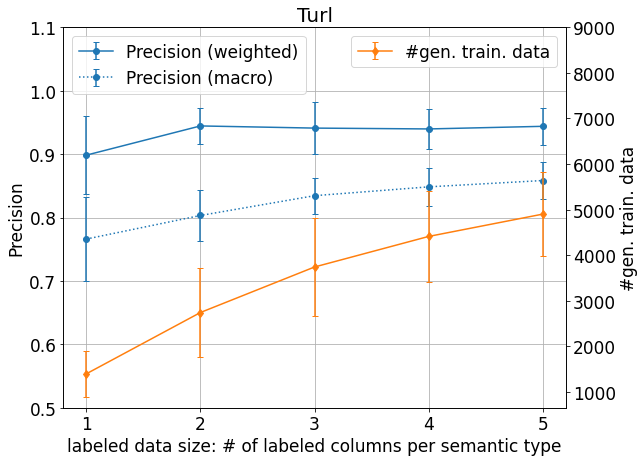

In [7]:
import os
from os.path import join
from dotenv import load_dotenv
load_dotenv(override=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

corpus = "turl"

if corpus == "turl":
    title = "Turl"
else:
    title = "Public BI"


x_values = [1,2,3,4,5]

y_values_precision_weighted = []
error_values_precision_weighted = []
y_values_precision_macro = []
error_values_precision_macro = []
y_values_support = []
error_values_support = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../emb_clus","without_knn","out", f"{corpus}_clustering_n_classify_results_gen_train_data_0.01_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_values_precision_weighted.append(df["mean"][f"precisions_weighted"])
    error_values_precision_weighted.append(df["std"][f"precisions_weighted"])
    
    y_values_precision_macro.append(df["mean"][f"precisions_macro"])
    error_values_precision_macro.append(df["std"][f"precisions_macro"])
    
    y_values_support.append(df["mean"][f"supports_weighted"])
    error_values_support.append(df["std"][f"supports_weighted"])

fig, ax1 = plt.subplots(figsize=(9,7))

plt.errorbar(x_values, y_values_precision_weighted, error_values_precision_weighted, marker="o", color="C0", capsize=3, label="Precision (weighted)")
plt.errorbar(x_values, y_values_precision_macro, error_values_precision_macro, marker="o", color=color, linestyle="dotted",capsize=3, label="Precision (macro)")

plt.yticks(np.arange(0.5,1.15,0.1), fontsize=17)
plt.xticks(np.arange(1,6,1), fontsize=17)
plt.grid()
plt.legend(loc=2,fontsize=17)
plt.title(f"{title}", fontsize=20)
plt.xlabel("labeled data size: # of labeled columns per semantic type", fontsize=17)
plt.ylabel(f"Precision", fontsize=17)
ax2 = ax1.twinx()
ax2.errorbar(x_values, y_values_support, error_values_support, marker="d", color="C1", capsize=3, label="#gen. train. data")
ax2.set_ylabel("#gen. train. data", fontsize=17)
ax2.set_yticks(np.arange(1000,10000,1000))
#ax2.set_yticks(np.arange(300,800,50))
ax2.tick_params(axis="y", labelsize=17)
ax2.legend(loc=0,fontsize=17)

plt.savefig(join("final_plots", f"{corpus}_gen_train_data_Embedding+Clustering.png"), bbox_inches='tight', dpi=100, transparent=True)
plt.show()

# Quality / Number of Header to sem. Type

## combine results of multiple runs with diff. random states

In [96]:
import os
from os.path import join
# from dotenv import load_dotenv
# load_dotenv(override=True)
import pandas as pd
import json
from sklearn.metrics import classification_report
import numpy as np

corpus = "public_bi"

#labeled_data_size = 5
distance_threshold = 0.01
for labeled_data_size in [1,2,3,4,5]:
    path = join("../labeling_functions","header_to_sem_type_sim","out","validation")
    scores = {
        "f1-scores_macro": [],
        "precisions_macro":[],
        "recalls_macro":[],
        "supports_macro": [],
        "f1-scores_weighted": [],
        "precisions_weighted": [],
        "recalls_weighted": [],
        "supports_weighted": []
    }


    for random_state in [1,2,3,4,5]:
        with open(join(path,f"{corpus}_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_{random_state}.json")) as f:
            current_class_report = json.load(f)
        for metric in ["macro","weighted"]:
            scores[f"f1-scores_{metric}"].append(current_class_report[f"{metric} avg"]["f1-score"])
            scores[f"precisions_{metric}"].append(current_class_report[f"{metric} avg"]["precision"])
            scores[f"recalls_{metric}"].append(current_class_report[f"{metric} avg"]["recall"])
            scores[f"supports_{metric}"].append(current_class_report[f"{metric} avg"]["support"])

    df_scores = pd.DataFrame(
        np.array([
            scores["f1-scores_macro"], scores["precisions_macro"],
            scores["recalls_macro"], scores["supports_macro"],
            scores["f1-scores_weighted"], scores["precisions_weighted"],
            scores["recalls_weighted"], scores["supports_weighted"]
        ]), index=scores.keys())
    df_scores["mean"] = df_scores.mean(axis=1)
    df_scores["std"] = df_scores.std(axis=1)
    df_scores["var"] = df_scores.var(axis=1)
    
    df_scores.to_csv(join(path,f"{corpus}_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_mean.csv"))

## plot results

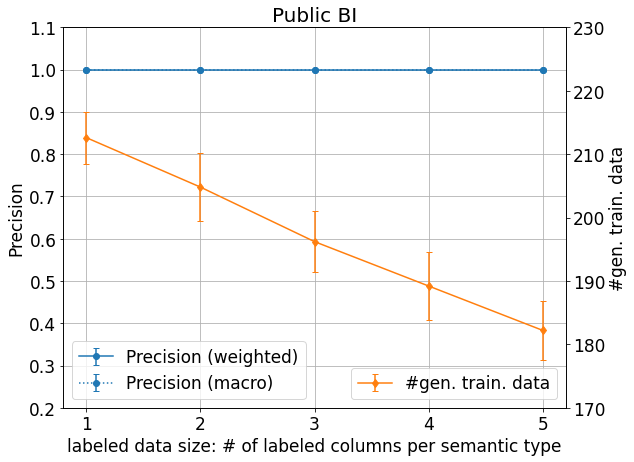

In [13]:
import os
from os.path import join
from dotenv import load_dotenv
load_dotenv(override=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

corpus = "public_bi"

if corpus == "turl":
    title = "Turl"
else:
    title = "Public BI"


x_values = [1,2,3,4,5]

y_values_precision_weighted = []
error_values_precision_weighted = []
y_values_precision_macro = []
error_values_precision_macro = []
y_values_support = []
error_values_support = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../labeling_functions","header_to_sem_type_sim","out","validation", f"{corpus}_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_values_precision_weighted.append(df["mean"][f"precisions_weighted"])
    error_values_precision_weighted.append(df["std"][f"precisions_weighted"])
    
    y_values_precision_macro.append(df["mean"][f"precisions_macro"])
    error_values_precision_macro.append(df["std"][f"precisions_macro"])
    
    y_values_support.append(df["mean"][f"supports_weighted"])
    error_values_support.append(df["std"][f"supports_weighted"])

fig, ax1 = plt.subplots(figsize=(9,7))

plt.errorbar(x_values, y_values_precision_weighted, error_values_precision_weighted, marker="o", color=color, capsize=3, label="Precision (weighted)")
plt.errorbar(x_values, y_values_precision_macro, error_values_precision_macro, marker="o", color=color, linestyle="dotted",capsize=3, label="Precision (macro)")

#plt.yticks(np.arange(0.9,1.15,0.05), fontsize=15)
plt.yticks(np.arange(0.2,1.15,0.1), fontsize=17)
plt.xticks(np.arange(1,6,1), fontsize=17)
plt.grid()
plt.legend(loc=3,fontsize=17)
plt.title(f"{title}", fontsize=20)
plt.xlabel("labeled data size: # of labeled columns per semantic type", fontsize=17)
plt.ylabel(f"Precision", fontsize=17)
ax2 = ax1.twinx()
ax2.errorbar(x_values, y_values_support, error_values_support, marker="d", color="C1", capsize=3, label="#gen. train. data")
ax2.set_ylabel("#gen. train. data", fontsize=17)
#ax2.set_yticks(np.arange(49700,50100,100))
ax2.set_yticks(np.arange(170,240,10))
ax2.tick_params(axis="y", labelsize=17)
ax2.legend(loc=4,fontsize=17)

plt.savefig(join("final_plots", f"{corpus}_gen_train_data_HeaderToSemType.png"), bbox_inches='tight', dpi=100, transparent=True)
plt.show()

# Quality / Number of Labeling by value-overlap

## combine results from multiple runs with diff. random states

In [1]:
import os
from os.path import join
# from dotenv import load_dotenv
# load_dotenv(override=True)
import pandas as pd
import json
from sklearn.metrics import classification_report
import numpy as np

corpus = "public_bi"

if corpus == "turl":
        check_elements_types = [
            "american_football.football_team",
            "automotive.model",
            "baseball.baseball_team",
            "film.film_genre",
            "ice_hockey.hockey_team",
            "location.us_county",
            "location.us_state",
            "music.genre",
            "soccer.football_team",
            "soccer.football_player",
            "sports.sports_league",
        ]
        regex_elements_in_col = [
            "aviation.aircraft_model", "internet.website",
            "award.award_category", "film.director",
            "american_football.football_player", "boats.ship_class",
            "cricket.cricket_player", "military.military_unit"
        ]
elif corpus == "public_bi":
    check_elements_types = ["gender", "language"]
    regex_elements_in_col = ["description", "gender"]

for check_element in check_elements_types:
    for labeled_data_size in [1,2,3,4,5]:
        path = join("../labeling_functions","check_elements_in_col", "out", "validation")
        scores = {
            "f1-score": [],
            "precision":[],
            "recall":[],
            "support": []
        }

        for random_state in [1,2,3,4,5]:
            with open(join(path,f"{corpus}_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_{random_state}.json")) as f:
                current_class_report = json.load(f)
            scores[f"f1-score"].append(current_class_report[f"{check_element}"]["f1-score"])
            scores[f"precision"].append(current_class_report[f"{check_element}"]["precision"])
            scores[f"recall"].append(current_class_report[f"{check_element}"]["recall"])
            #scores[f"support"].append(current_class_report[f"{check_element}"]["support"])
            scores[f"support"].append(current_class_report[f"macro avg"]["support"])

        df_scores = pd.DataFrame(
            np.array([
                scores["f1-score"], scores["precision"],
                scores["recall"], scores["support"]
            ]), index=scores.keys())
        df_scores["mean"] = df_scores.mean(axis=1)
        df_scores["std"] = df_scores.std(axis=1)
        df_scores["var"] = df_scores.var(axis=1)
        
        df_scores.to_csv(join(path,f"{corpus}_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"))

## plot results

In [2]:
import matplotlib
matplotlib.__version__

'3.3.0'

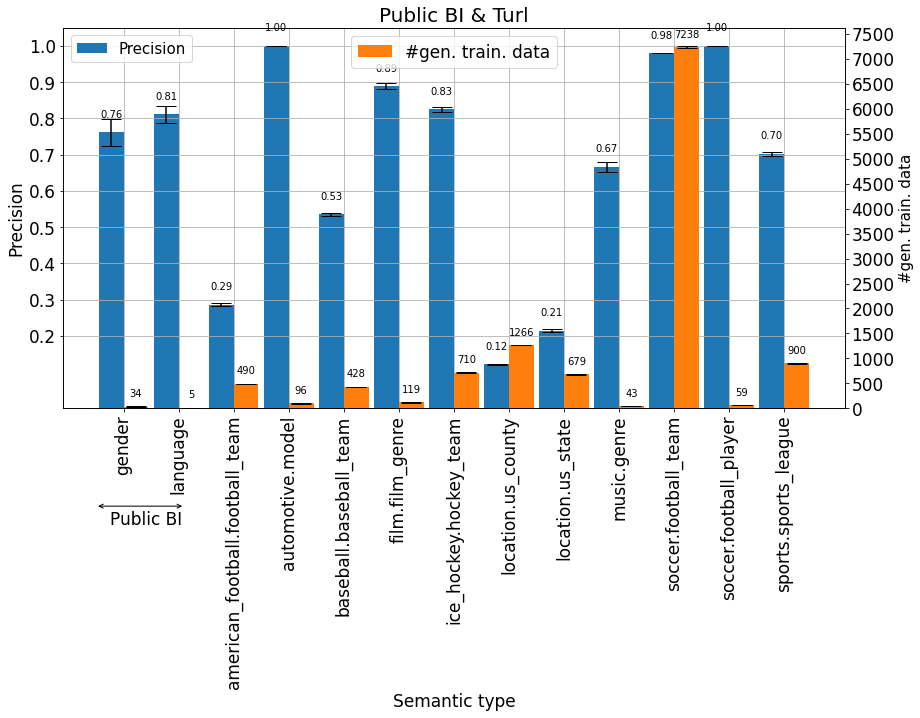

In [23]:
import os
from os.path import join
# from dotenv import load_dotenv
# load_dotenv(override=True)
import pandas as pd
import json
from sklearn.metrics import classification_report
import numpy as np
from matplotlib import pyplot as plt

corpus = "turl"
labeled_data_size = 1


turl_check_elements_types = [
    "american_football.football_team",
    "automotive.model",
    "baseball.baseball_team",
    "film.film_genre",
    "ice_hockey.hockey_team",
    "location.us_county",
    "location.us_state",
    "music.genre",
    "soccer.football_team",
    "soccer.football_player",
    "sports.sports_league",
]
turl_regex_elements_in_col = [
    "aviation.aircraft_model", "internet.website",
    "award.award_category", "film.director",
    "american_football.football_player", "boats.ship_class",
    "cricket.cricket_player", "military.military_unit"
]

public_bi_check_elements_types = ["gender", "language"]
public_bi_regex_elements_in_col = ["description", "gender"]
    
check_elements_types = public_bi_check_elements_types+turl_check_elements_types
    
x_values = np.arange(0,len(check_elements_types))

y_values_precision = []
error_values_precision = []

y_values_support = []
error_values_support = []

for check_element in check_elements_types:
    # get Sato Baseline scores
    if check_element in turl_check_elements_types:
        corpus = "turl"
    else:
        corpus = "public_bi"
    df = pd.read_csv(join("../labeling_functions","check_elements_in_col","out","validation", f"{corpus}_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_values_precision.append(df["mean"][f"precision"])
    error_values_precision.append(df["std"][f"precision"])
    
    y_values_support.append(df["mean"][f"support"])
    error_values_support.append(df["std"][f"support"])

fig, ax1 = plt.subplots(figsize=(14,7))

ax1.bar(x_values-0.225, y_values_precision, yerr=error_values_precision, width=0.45, align="center", color=color, capsize=10, label="Precision")

#plt.yticks(np.arange(0.9,1.15,0.05), fontsize=15)
ax1.set_yticks(np.arange(0.2,1.1,0.1))
ax1.set_xticks(x_values)
ax1.set_xticklabels(check_elements_types, rotation=90)
plt.grid()
plt.legend(loc=2,fontsize=15)
plt.title(f"Public BI & Turl", fontsize=20)
plt.xlabel("Semantic type", fontsize=17)
plt.ylabel(f"Precision", fontsize=17)
ax2 = ax1.twinx()
ax2.bar(x_values+0.225, y_values_support, yerr=error_values_support, width=0.45, color="C1", capsize=10, label="#gen. train. data")
ax2.set_ylabel("#gen. train. data", fontsize=15)
#ax2.set_yticks(np.arange(49700,50100,100))
ax2.set_yticks(np.arange(0,8000,500))
ax1.tick_params(axis="both", labelsize=17)
ax2.tick_params(axis="both", labelsize=17)
ax2.set_xticks(x_values, check_elements_types)
ax2.legend(loc=9,fontsize=17)

## annotations
ax1.annotate("", xy=(-0.5,-0.27), xytext=(1.1,-.27), arrowprops=dict(arrowstyle="<->", facecolor="red"), annotation_clip=False)
ax1.annotate('Public BI',xy=(-1.5,-0.32),xytext=(-0.25,-0.32), annotation_clip=False, fontsize=17)

# zip joins x and y coordinates in pairs
for x,y in zip(x_values-0.225,y_values_precision):

    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,15), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

# zip joins x and y coordinates in pairs
for x,y in zip(x_values+0.225,y_values_support):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

plt.savefig(join("final_plots", f"Gen_train_data_LabelungByValueOverlap.png"), bbox_inches='tight', dpi=100, transparent=True)
plt.show()
    


# Quality / Numbers of Labeling by value-patterns

## combine results of multiple runs with diff. random states

In [17]:
import os
from os.path import join
# from dotenv import load_dotenv
# load_dotenv(override=True)
import pandas as pd
import json
from sklearn.metrics import classification_report
import numpy as np

corpus = "public_bi"

if corpus == "turl":
        check_elements_types = [
            "american_football.football_team",
            "automotive.model",
            "baseball.baseball_team",
            "film.film_genre",
            "ice_hockey.hockey_team",
            "location.us_county",
            "location.us_state",
            "music.genre",
            "soccer.football_team",
            "soccer.football_player",
            "sports.sports_league",
        ]
        regex_elements_in_col = [
            "aviation.aircraft_model", "internet.website",
            "award.award_category", "film.director",
            "american_football.football_player", "boats.ship_class",
            "cricket.cricket_player", "military.military_unit"
        ]
elif corpus == "public_bi":
    check_elements_types = ["gender", "language"]
    # regex_elements_in_col = ["description", "name"]
    regex_elements_in_col = ["name", "description"]

for check_element in regex_elements_in_col:
    for labeled_data_size in [1,2,3,4,5]:
        path = join("../labeling_functions","regex_elements_in_col", "out", "validation")
        scores = {
            "f1-score": [],
            "precision":[],
            "recall":[],
            "support": []
        }

        for random_state in [1,2,3,4,5]:
            with open(join(path,f"{corpus}_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_{random_state}.json")) as f:
                current_class_report = json.load(f)
            scores[f"f1-score"].append(current_class_report[f"{check_element}"]["f1-score"])
            scores[f"precision"].append(current_class_report[f"{check_element}"]["precision"])
            scores[f"recall"].append(current_class_report[f"{check_element}"]["recall"])
            scores[f"support"].append(current_class_report[f"{check_element}"]["support"])

        df_scores = pd.DataFrame(
            np.array([
                scores["f1-score"], scores["precision"],
                scores["recall"], scores["support"]
            ]), index=scores.keys())
        df_scores["mean"] = df_scores.mean(axis=1)
        df_scores["std"] = df_scores.std(axis=1)
        df_scores["var"] = df_scores.var(axis=1)
        
        df_scores.to_csv(join(path,f"{corpus}_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"))

## plot results

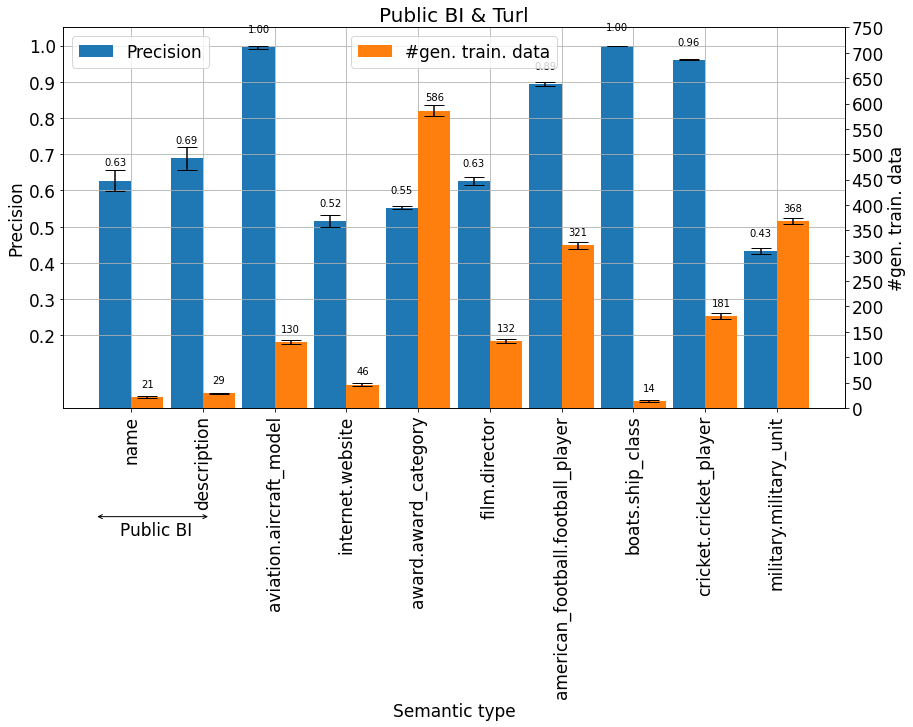

In [28]:
import os
from os.path import join
# from dotenv import load_dotenv
# load_dotenv(override=True)
import pandas as pd
import json
from sklearn.metrics import classification_report
import numpy as np
from matplotlib import pyplot as plt

corpus = "turl"
labeled_data_size = 1


turl_check_elements_types = [
    "american_football.football_team",
    "automotive.model",
    "baseball.baseball_team",
    "film.film_genre",
    "ice_hockey.hockey_team",
    "location.us_county",
    "location.us_state",
    "music.genre",
    "soccer.football_team",
    "soccer.football_player",
    "sports.sports_league",
]
turl_regex_elements_in_col = [
    "aviation.aircraft_model", "internet.website",
    "award.award_category", "film.director",
    "american_football.football_player", "boats.ship_class",
    "cricket.cricket_player", "military.military_unit"
]

public_bi_check_elements_types = ["gender", "language"]
public_bi_regex_elements_in_col = ["name", "description"]
    
check_elements_types = public_bi_regex_elements_in_col+turl_regex_elements_in_col
    
x_values = np.arange(0,len(check_elements_types))

y_values_precision = []
error_values_precision = []

y_values_support = []
error_values_support = []

for check_element in check_elements_types:
    # get Sato Baseline scores
    if check_element in turl_regex_elements_in_col:
        corpus = "turl"
    else:
        corpus = "public_bi"
    df = pd.read_csv(join("../labeling_functions","regex_elements_in_col","out","validation", f"{corpus}_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_values_precision.append(df["mean"][f"precision"])
    error_values_precision.append(df["std"][f"precision"])
    
    y_values_support.append(df["mean"][f"support"])
    error_values_support.append(df["std"][f"support"])

fig, ax1 = plt.subplots(figsize=(14,7))

ax1.bar(x_values-0.225, y_values_precision, yerr=error_values_precision, width=0.45, align="center", color=color, capsize=10, label="Precision")

#plt.yticks(np.arange(0.9,1.15,0.05), fontsize=15)
ax1.set_yticks(np.arange(0.2,1.1,0.1))
ax1.set_xticks(x_values)
ax1.set_xticklabels(check_elements_types, rotation=90)
plt.grid()
plt.legend(loc=2,fontsize=17)
plt.title(f"Public BI & Turl", fontsize=20)
plt.xlabel("Semantic type", fontsize=17)
plt.ylabel(f"Precision", fontsize=17)
ax2 = ax1.twinx()
ax2.bar(x_values+0.225, y_values_support, yerr=error_values_support, width=0.45, color="C1", capsize=10, label="#gen. train. data")
ax2.set_ylabel("#gen. train. data", fontsize=17)
#ax2.set_yticks(np.arange(49700,50100,100))
ax2.set_yticks(np.arange(0,800,50))
ax1.tick_params(axis="both", labelsize=17)
ax2.tick_params(axis="both", labelsize=17)
ax2.set_xticks(x_values, check_elements_types)
ax2.legend(loc=9,fontsize=17)


## annotations
ax1.annotate("", xy=(-0.5,-0.3), xytext=(1.1,-.3), arrowprops=dict(arrowstyle="<->", facecolor="red"), annotation_clip=False)
ax1.annotate('Public BI',xy=(-0.5,-0.35),xytext=(-0.15,-0.35), annotation_clip=False, fontsize=17)

# zip joins x and y coordinates in pairs
for x,y in zip(x_values-0.225,y_values_precision):

    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,15), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

# zip joins x and y coordinates in pairs
for x,y in zip(x_values+0.225,y_values_support):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

plt.savefig(join("final_plots", f"Gen_train_data_LabelingByValuePattern.png"), bbox_inches='tight', dpi=100, transparent=True)
plt.show()
    


# Quality / Numbers of the differen LFs

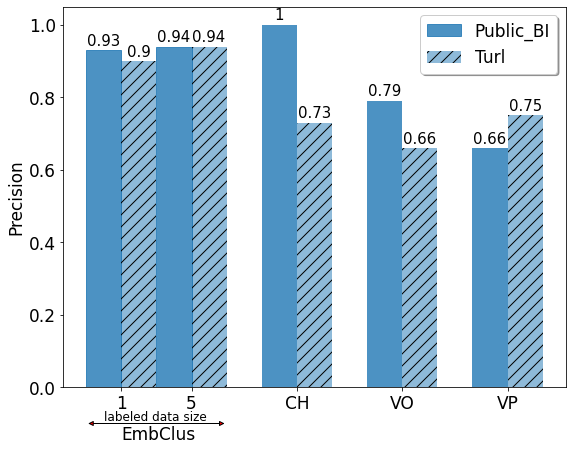

In [258]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import join


##### load values for EmbClus
x_values = [1,2,3,4,5]

y_emb_clus_public_bi = []
y_emb_clus_public_bi_macro = []
y_emb_clus_turl = []
y_emb_clus_turl_macro = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../emb_clus","without_knn","out", f"public_bi_clustering_n_classify_results_gen_train_data_0.01_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)    
    y_emb_clus_public_bi.append(round(df["mean"][f"precisions_weighted"],2))
    y_emb_clus_public_bi_macro.append(round(df["mean"][f"precisions_macro"],2))

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../emb_clus","without_knn","out", f"turl_clustering_n_classify_results_gen_train_data_0.01_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)    
    y_emb_clus_turl.append(round(df["mean"][f"precisions_weighted"],2))
    y_emb_clus_turl_macro.append(round(df["mean"][f"precisions_macro"],2))


###### load values for CH
x_values = [1,2,3,4,5]

y_ch_public_bi = []
y_ch_turl = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../labeling_functions","header_to_sem_type_sim","out","validation", f"public_bi_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_ch_public_bi.append(df["mean"][f"precisions_weighted"])

y_ch_public_bi = round(sum(y_ch_public_bi)/len(y_ch_public_bi),2)
   
for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../labeling_functions","header_to_sem_type_sim","out","validation", f"turl_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_ch_turl.append(df["mean"][f"precisions_weighted"]) 

y_ch_turl = round(sum(y_ch_turl)/len(y_ch_turl),2)


####### load values for VO
labeled_data_size = 1

turl_check_elements_types = [
    "american_football.football_team",
    "automotive.model",
    "baseball.baseball_team",
    "film.film_genre",
    "ice_hockey.hockey_team",
    "location.us_county",
    "location.us_state",
    "music.genre",
    "soccer.football_team",
    "soccer.football_player",
    "sports.sports_league",
]
turl_regex_elements_in_col = [
    "aviation.aircraft_model", "internet.website",
    "award.award_category", "film.director",
    "american_football.football_player", "boats.ship_class",
    "cricket.cricket_player", "military.military_unit"
]

public_bi_check_elements_types = ["gender", "language"]
public_bi_regex_elements_in_col = ["description", "name"]
    
check_elements_types = public_bi_check_elements_types+turl_check_elements_types

y_vo_public_bi_precision = []
y_vo_public_bi_support = []
y_vo_turl_precision = []
y_vo_turl_support = []

for check_element in public_bi_check_elements_types:
    df = pd.read_csv(join("../labeling_functions","check_elements_in_col","out","validation", f"public_bi_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vo_public_bi_precision.append(df["mean"][f"precision"])
    y_vo_public_bi_support.append(df["mean"][f"support"])

#y_vo_public_bi_precision = round(sum(np.array(y_vo_public_bi_precision) * np.array(y_vo_public_bi_support)) / sum(y_vo_public_bi_support),2)
y_vo_public_bi_precision = round(sum(y_vo_public_bi_precision) / len(y_vo_public_bi_precision),2)

for check_element in turl_check_elements_types:
    df = pd.read_csv(join("../labeling_functions","check_elements_in_col","out","validation", f"turl_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vo_turl_precision.append(df["mean"][f"precision"])
    y_vo_turl_support.append(df["mean"][f"support"])

#y_vo_turl_precision = round(sum(np.array(y_vo_turl_precision) * np.array(y_vo_turl_support)) / sum(y_vo_turl_support),2)
y_vo_turl_precision = round(sum(y_vo_turl_precision)/len(y_vo_turl_precision),2)

###### load values for VP
y_vp_public_bi_precision = []
y_vp_public_bi_support = []
y_vp_turl_precision = []
y_vp_turl_support = []

for check_element in public_bi_regex_elements_in_col:
    df = pd.read_csv(join("../labeling_functions","regex_elements_in_col","out","validation", f"public_bi_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vp_public_bi_precision.append(df["mean"][f"precision"])
    y_vp_public_bi_support.append(df["mean"][f"support"])

#y_vp_public_bi_precision = round(sum(np.array(y_vp_public_bi_precision) * np.array(y_vp_public_bi_support)) / sum(y_vp_public_bi_support),2)
y_vp_public_bi_precision = round(sum(y_vp_public_bi_precision) / len(y_vp_public_bi_precision),2)

for check_element in turl_regex_elements_in_col:
    df = pd.read_csv(join("../labeling_functions","regex_elements_in_col","out","validation", f"turl_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vp_turl_precision.append(df["mean"][f"precision"])
    y_vp_turl_support.append(df["mean"][f"support"])

#y_vp_turl_precision = round(sum(np.array(y_vp_turl_precision) * np.array(y_vp_turl_support)) / sum(y_vp_turl_support),2)
y_vp_turl_precision = round(sum(y_vp_turl_precision)/len(y_vp_turl_precision),2)


color = "C0"
labels = ["1","2","3","4", "5", "c-headers", "overlap", "pattern"]

width = 0.5
x_emb_clus = np.array([1,2])
#y_emb_clus_public_bi = [0.1,0.2,0.3,0.4,0.5]
#y_emb_clus_turl = [0.15,0.25,0.35,0.45,0.55]

x_column_header = [5.5]

fig, ax = plt.subplots(figsize=(9,7))
#ax2 = ax.twinx()

rects1 = ax.bar(x_emb_clus - width/2, [y_emb_clus_public_bi[0],y_emb_clus_public_bi[4]], width=width, label="Public_BI", color=color, alpha=0.8, edgecolor=color)
#rects1_2 = ax.bar(x_emb_clus - width/2, y_emb_clus_public_bi_macro, width=width, label="Public_BI", color=color, edgecolor=color)
rects2 = ax.bar(x_emb_clus + width/2, [y_emb_clus_turl[0],y_emb_clus_turl[4]], width=width, label="Turl", color=color, alpha=0.5, hatch="//")
#rects2_2 = ax.bar(x_emb_clus + width/2, y_emb_clus_turl_macro, width=width, label="Turl", color=color, alpha=0.5, hatch="//")

rects3 = ax.bar([3.5-width/2], [y_ch_public_bi], width=width, label="Public_BI", color=color,alpha=0.8)
rects4 = ax.bar([3.5+width/2], [y_ch_turl], width=width, label="Turl", color=color, alpha=0.5, hatch="//")

rects5 = ax.bar([5-width/2], [y_vo_public_bi_precision], width=width, label="Public_BI", color=color,alpha=0.8)
rects6 = ax.bar([5+width/2], [y_vo_turl_precision], width=width, label="Turl", color=color, alpha=0.5, hatch="//")

rects7 = ax.bar([6.5-width/2], [y_vp_public_bi_precision], width=width, label="Public BI", color=color, alpha=0.8)
rects8 = ax.bar([6.5+width/2], [y_vp_turl_precision], width=width, label="Turl", color=color, alpha=0.5, hatch="//")

ax.set_xticks([1,2,3.5,5,6.5], ["1","5","CH", "VO", "VP"])
ax.set_ylabel("Precision", fontsize=17)
ax.tick_params(axis="both", labelsize=17)

## annotations
ax.annotate("", xy=(0.5,-0.1), xytext=(2.5,-.1), arrowprops=dict(arrowstyle="<|-|>", facecolor="red"), annotation_clip=False)
ax.annotate('labeled data size',xy=(0.5,12.4),xytext=(0.75,-0.093), annotation_clip=False, fontsize=12)#
ax.annotate('EmbClus',xy=(0.5,-0.33),xytext=(1,-0.145), annotation_clip=False, fontsize=17)#

fontsize_bar_labels = 15
ax.bar_label(rects1, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects2, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects3, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects4, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects5, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects6, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects7, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects8, padding=2, fontsize=fontsize_bar_labels)

ax.legend(handles=[rects1, rects2], loc=1, fontsize=17, fancybox=True, shadow=True)
plt.savefig(join("final_plots", f"Gen_train_data_all_LFs_precision.png"), bbox_inches='tight', dpi=100, transparent=True)
plt.show()



C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


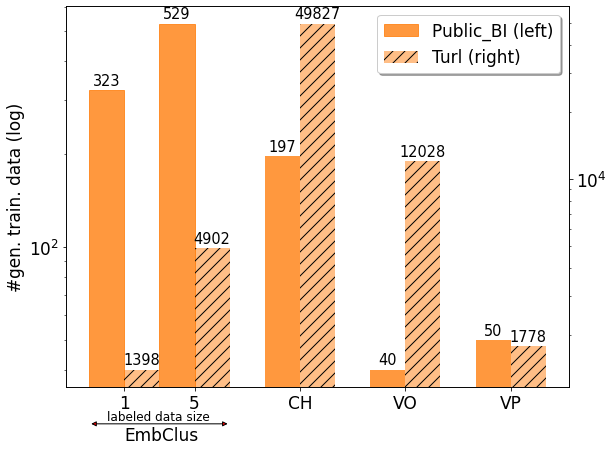

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import join


##### load values for EmbClus
x_values = [1,2,3,4,5]

y_emb_clus_public_bi = []
y_emb_clus_turl = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../emb_clus","without_knn","out", f"public_bi_clustering_n_classify_results_gen_train_data_0.01_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)    
    y_emb_clus_public_bi.append(round(df["mean"][f"supports_weighted"],0))

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../emb_clus","without_knn","out", f"turl_clustering_n_classify_results_gen_train_data_0.01_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)    
    y_emb_clus_turl.append(round(df["mean"][f"supports_weighted"],0))


###### load values for CH
x_values = [1,2,3,4,5]

y_ch_public_bi = []
y_ch_turl = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../labeling_functions","header_to_sem_type_sim","out","validation", f"public_bi_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_ch_public_bi.append(df["mean"][f"supports_weighted"])

y_ch_public_bi = round(sum(y_ch_public_bi)/len(y_ch_public_bi),0)
   
for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../labeling_functions","header_to_sem_type_sim","out","validation", f"turl_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_ch_turl.append(df["mean"][f"supports_weighted"]) 

y_ch_turl = round(sum(y_ch_turl)/len(y_ch_turl),0)


####### load values for VO
labeled_data_size = 1

turl_check_elements_types = [
    "american_football.football_team",
    "automotive.model",
    "baseball.baseball_team",
    "film.film_genre",
    "ice_hockey.hockey_team",
    "location.us_county",
    "location.us_state",
    "music.genre",
    "soccer.football_team",
    "soccer.football_player",
    "sports.sports_league",
]
turl_regex_elements_in_col = [
    "aviation.aircraft_model", "internet.website",
    "award.award_category", "film.director",
    "american_football.football_player", "boats.ship_class",
    "cricket.cricket_player", "military.military_unit"
]

public_bi_check_elements_types = ["gender", "language"]
public_bi_regex_elements_in_col = ["description", "name"]
    
check_elements_types = public_bi_check_elements_types+turl_check_elements_types

y_vo_public_bi_precision = []
y_vo_public_bi_support = []
y_vo_turl_precision = []
y_vo_turl_support = []

for check_element in public_bi_check_elements_types:
    df = pd.read_csv(join("../labeling_functions","check_elements_in_col","out","validation", f"public_bi_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vo_public_bi_precision.append(df["mean"][f"precision"])
    y_vo_public_bi_support.append(df["mean"][f"support"])

#y_vo_public_bi_precision = round(sum(np.array(y_vo_public_bi_precision) * np.array(y_vo_public_bi_support)) / sum(y_vo_public_bi_support),2)
#y_vo_public_bi_support = round(sum(y_vo_public_bi_support) / len(y_vo_public_bi_support),0)
y_vo_public_bi_support = round(sum(y_vo_public_bi_support),0)

for check_element in turl_check_elements_types:
    df = pd.read_csv(join("../labeling_functions","check_elements_in_col","out","validation", f"turl_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vo_turl_precision.append(df["mean"][f"precision"])
    y_vo_turl_support.append(df["mean"][f"support"])

#y_vo_turl_precision = round(sum(np.array(y_vo_turl_precision) * np.array(y_vo_turl_support)) / sum(y_vo_turl_support),2)
#y_vo_turl_support = round(sum(y_vo_turl_support)/len(y_vo_turl_support),0)
y_vo_turl_support = round(sum(y_vo_turl_support),0)

###### load values for VP
y_vp_public_bi_precision = []
y_vp_public_bi_support = []
y_vp_turl_precision = []
y_vp_turl_support = []

for check_element in public_bi_regex_elements_in_col:
    df = pd.read_csv(join("../labeling_functions","regex_elements_in_col","out","validation", f"public_bi_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vp_public_bi_precision.append(df["mean"][f"precision"])
    y_vp_public_bi_support.append(df["mean"][f"support"])

#y_vp_public_bi_precision = round(sum(np.array(y_vp_public_bi_precision) * np.array(y_vp_public_bi_support)) / sum(y_vp_public_bi_support),2)
#y_vp_public_bi_support = round(sum(y_vp_public_bi_support) / len(y_vp_public_bi_support),0)
y_vp_public_bi_support = round(sum(y_vp_public_bi_support),0)

for check_element in turl_regex_elements_in_col:
    df = pd.read_csv(join("../labeling_functions","regex_elements_in_col","out","validation", f"turl_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vp_turl_precision.append(df["mean"][f"precision"])
    y_vp_turl_support.append(df["mean"][f"support"])

#y_vp_turl_precision = round(sum(np.array(y_vp_turl_precision) * np.array(y_vp_turl_support)) / sum(y_vp_turl_support),2)
#y_vp_turl_support = round(sum(y_vp_turl_support)/len(y_vp_turl_support),0)
y_vp_turl_support = round(sum(y_vp_turl_support),0)


color = "C1"

labels = ["1","2","3","4", "5", "c-headers", "overlap", "pattern"]

width = 0.5
x_emb_clus = np.array([1,2])
#y_emb_clus_public_bi = [0.1,0.2,0.3,0.4,0.5]
#y_emb_clus_turl = [0.15,0.25,0.35,0.45,0.55]

x_column_header = [5.5]

fig, ax = plt.subplots(figsize=(9,7))
ax2 = ax.twinx()

rects1 = ax.bar(x_emb_clus - width/2, [y_emb_clus_public_bi[0],y_emb_clus_public_bi[4]], width=width, label="Public_BI (left)", color=color, alpha=0.8, edgecolor=color)
rects2 = ax2.bar(x_emb_clus + width/2, [y_emb_clus_turl[0],y_emb_clus_turl[4]], width=width, label="Turl (right)", color=color, alpha=0.5, hatch="//")

# rects3 = ax.bar([6.5-width/2], [y_ch_public_bi], width=width, label="Public_BI", color=color, alpha=0.8)
# rects4 = ax2.bar([6.5+width/2], [y_ch_turl], width=width, label="Turl", color=color, alpha=0.5, hatch="//")
rects3 = ax.bar([3.5-width/2], [y_ch_public_bi], width=width, label="Public_BI", color=color, alpha=0.8)
rects4 = ax2.bar([3.5+width/2], [y_ch_turl], width=width, label="Turl", color=color, alpha=0.5, hatch="//")

# rects5 = ax.bar([8-width/2], [y_vo_public_bi_support], width=width, label="Public_BI", color=color, alpha=0.8)
# rects6 = ax2.bar([8+width/2], [y_vo_turl_support], width=width, label="Turl", color=color, alpha=0.5, hatch="//")
rects5 = ax.bar([5-width/2], [y_vo_public_bi_support], width=width, label="Public_BI", color=color, alpha=0.8)
rects6 = ax2.bar([5+width/2], [y_vo_turl_support], width=width, label="Turl", color=color, alpha=0.5, hatch="//")


# rects7 = ax.bar([9.5-width/2], [y_vp_public_bi_support], width=width, label="Public BI", color=color, alpha=0.8)
# rects8 = ax2.bar([9.5+width/2], [y_vp_turl_support], width=width, label="Turl", color=color, alpha=0.5, hatch="//")
rects7 = ax.bar([6.5-width/2], [y_vp_public_bi_support], width=width, label="Public BI", color=color, alpha=0.8)
rects8 = ax2.bar([6.5+width/2], [y_vp_turl_support], width=width, label="Turl", color=color, alpha=0.5, hatch="//")

ax.set_xticks([1,2,3.5,5,6.5], ["1","5","CH", "VO", "VP"])
ax.set_ylabel("#gen. train. data (log)", fontsize=17)
ax.tick_params(axis="both", labelsize=17)
ax2.tick_params(axis="both", labelsize=17)

## annotations
#ax2.annotate("", xy=(0.5,-4000), xytext=(5.5,-4000), arrowprops=dict(arrowstyle="<|-|>", facecolor="red"), annotation_clip=False)
#ax2.annotate('EmbClus',xy=(0.5,-6500),xytext=(2.25,-6500), annotation_clip=False, fontsize=17)#
ax.annotate("", xy=(0.5,26.7), xytext=(2.5,26.7), arrowprops=dict(arrowstyle="<|-|>", facecolor="red"), annotation_clip=False)
ax.annotate('labeled data size',xy=(0.5,12.4),xytext=(0.75,27.4), annotation_clip=False, fontsize=12)#
ax.annotate('EmbClus',xy=(0.5,23.7),xytext=(1,23.7), annotation_clip=False, fontsize=17)#


fontsize_bar_labels = 14.5
ax.bar_label(rects1, padding=2, fontsize=fontsize_bar_labels)
ax2.bar_label(rects2, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects3, padding=2, fontsize=fontsize_bar_labels)
ax2.bar_label(rects4, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects5, padding=2, fontsize=fontsize_bar_labels)
ax2.bar_label(rects6, padding=2, fontsize=fontsize_bar_labels)
ax.bar_label(rects7, padding=2, fontsize=fontsize_bar_labels)
ax2.bar_label(rects8, padding=2, fontsize=fontsize_bar_labels)

ax.set_yscale("log")
ax2.set_yscale("log")


#ax.legend(handles=[rects1, rects2], loc=2, fontsize=17, bbox_to_anchor=(1,1))
ax.legend(handles=[rects1, rects2], loc=1, fontsize=17, fancybox=True, shadow=True)

plt.savefig(join("final_plots", f"Gen_train_data_all_LFs_numbers.png"), bbox_inches='tight', dpi=100, transparent=True)
plt.show()


In [92]:
y_emb_clus_public_bi[4]+y_ch_public_bi+y_vo_public_bi_support+y_vp_public_bi_support

816.0

In [93]:
y_emb_clus_turl[4]+y_ch_turl+y_vo_turl_support+y_vp_turl_support

68535.0

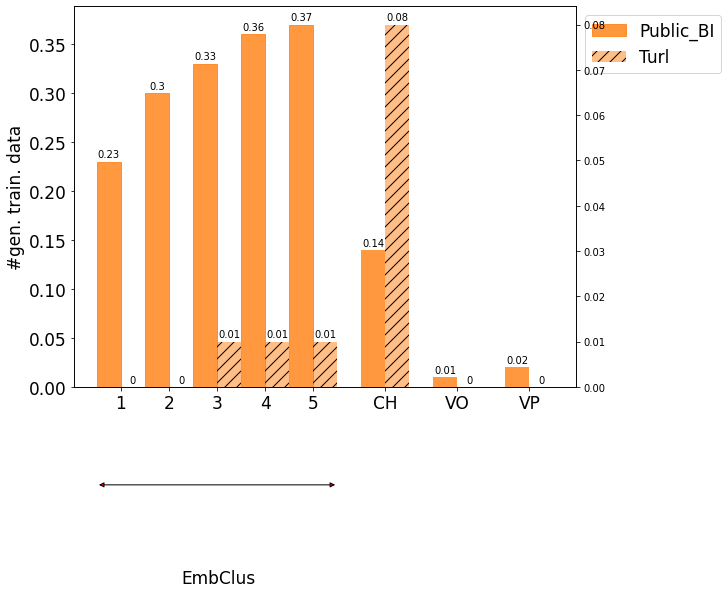

In [25]:
import matplotlib.pyplot as plt
import numpy as np

total_column_number_public_bi = 1424
total_column_number_turl = 640361

##### load values for EmbClus
x_values = [1,2,3,4,5]

y_emb_clus_public_bi = []
y_emb_clus_turl = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../emb_clus","without_knn","out", f"public_bi_clustering_n_classify_results_gen_train_data_0.01_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)    
    y_emb_clus_public_bi.append(round(df["mean"][f"supports_weighted"]/total_column_number_public_bi,2))

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../emb_clus","without_knn","out", f"turl_clustering_n_classify_results_gen_train_data_0.01_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)    
    y_emb_clus_turl.append(round(df["mean"][f"supports_weighted"]/total_column_number_turl,2))


###### load values for CH
x_values = [1,2,3,4,5]

y_ch_public_bi = []
y_ch_turl = []

for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../labeling_functions","header_to_sem_type_sim","out","validation", f"public_bi_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_ch_public_bi.append(df["mean"][f"supports_weighted"])

y_ch_public_bi = round((sum(y_ch_public_bi)/len(y_ch_public_bi))/total_column_number_public_bi,2)
   
for labeled_data_size in x_values:
    # get Sato Baseline scores
    df = pd.read_csv(join("../labeling_functions","header_to_sem_type_sim","out","validation", f"turl_classification_report_unlabeled_0.9_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_ch_turl.append(df["mean"][f"supports_weighted"]) 

y_ch_turl = round((sum(y_ch_turl)/len(y_ch_turl))/total_column_number_turl,2)


####### load values for VO
labeled_data_size = 1

turl_check_elements_types = [
    "american_football.football_team",
    "automotive.model",
    "baseball.baseball_team",
    "film.film_genre",
    "ice_hockey.hockey_team",
    "location.us_county",
    "location.us_state",
    "music.genre",
    "soccer.football_team",
    "soccer.football_player",
    "sports.sports_league",
]
turl_regex_elements_in_col = [
    "aviation.aircraft_model", "internet.website",
    "award.award_category", "film.director",
    "american_football.football_player", "boats.ship_class",
    "cricket.cricket_player", "military.military_unit"
]

public_bi_check_elements_types = ["gender", "language"]
public_bi_regex_elements_in_col = ["description", "name"]
    
check_elements_types = public_bi_check_elements_types+turl_check_elements_types

y_vo_public_bi_precision = []
y_vo_public_bi_support = []
y_vo_turl_precision = []
y_vo_turl_support = []

for check_element in public_bi_check_elements_types:
    df = pd.read_csv(join("../labeling_functions","check_elements_in_col","out","validation", f"public_bi_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vo_public_bi_precision.append(df["mean"][f"precision"])
    y_vo_public_bi_support.append(df["mean"][f"support"])

#y_vo_public_bi_precision = round(sum(np.array(y_vo_public_bi_precision) * np.array(y_vo_public_bi_support)) / sum(y_vo_public_bi_support),2)
y_vo_public_bi_support = round((sum(y_vo_public_bi_support) / len(y_vo_public_bi_support))/total_column_number_public_bi,2)

for check_element in turl_check_elements_types:
    df = pd.read_csv(join("../labeling_functions","check_elements_in_col","out","validation", f"turl_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vo_turl_precision.append(df["mean"][f"precision"])
    y_vo_turl_support.append(df["mean"][f"support"])

#y_vo_turl_precision = round(sum(np.array(y_vo_turl_precision) * np.array(y_vo_turl_support)) / sum(y_vo_turl_support),2)
y_vo_turl_support = round((sum(y_vo_turl_support)/len(y_vo_turl_support))/total_column_number_turl,2)

###### load values for VP
y_vp_public_bi_precision = []
y_vp_public_bi_support = []
y_vp_turl_precision = []
y_vp_turl_support = []

for check_element in public_bi_regex_elements_in_col:
    df = pd.read_csv(join("../labeling_functions","regex_elements_in_col","out","validation", f"public_bi_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vp_public_bi_precision.append(df["mean"][f"precision"])
    y_vp_public_bi_support.append(df["mean"][f"support"])

#y_vp_public_bi_precision = round(sum(np.array(y_vp_public_bi_precision) * np.array(y_vp_public_bi_support)) / sum(y_vp_public_bi_support),2)
y_vp_public_bi_support = round((sum(y_vp_public_bi_support) / len(y_vp_public_bi_support))/total_column_number_public_bi,2)

for check_element in turl_regex_elements_in_col:
    df = pd.read_csv(join("../labeling_functions","regex_elements_in_col","out","validation", f"turl_classification_report_unlabeled_{check_element}_0.2_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    y_vp_turl_precision.append(df["mean"][f"precision"])
    y_vp_turl_support.append(df["mean"][f"support"])

#y_vp_turl_precision = round(sum(np.array(y_vp_turl_precision) * np.array(y_vp_turl_support)) / sum(y_vp_turl_support),2)
y_vp_turl_support = round((sum(y_vp_turl_support)/len(y_vp_turl_support))/total_column_number_turl,2)


color = "C1"

labels = ["1","2","3","4", "5", "c-headers", "overlap", "pattern"]

width = 0.5
x_emb_clus = np.array([1,2,3,4,5])
#y_emb_clus_public_bi = [0.1,0.2,0.3,0.4,0.5]
#y_emb_clus_turl = [0.15,0.25,0.35,0.45,0.55]

x_column_header = [5.5]

fig, ax = plt.subplots(figsize=(9,7))
ax2 = ax.twinx()

rects1 = ax.bar(x_emb_clus - width/2, y_emb_clus_public_bi, width=width, label="Public_BI", color=color, alpha=0.8, edgecolor=color)
rects2 = ax2.bar(x_emb_clus + width/2, y_emb_clus_turl, width=width, label="Turl", color=color, alpha=0.5, hatch="//")

rects3 = ax.bar([6.5-width/2], [y_ch_public_bi], width=width, label="Public_BI", color=color, alpha=0.8)
rects4 = ax2.bar([6.5+width/2], [y_ch_turl], width=width, label="Turl", color=color, alpha=0.5, hatch="//")

rects5 = ax.bar([8-width/2], [y_vo_public_bi_support], width=width, label="Public_BI", color=color, alpha=0.8)
rects6 = ax2.bar([8+width/2], [y_vo_turl_support], width=width, label="Turl", color=color, alpha=0.5, hatch="//")

rects7 = ax.bar([9.5-width/2], [y_vp_public_bi_support], width=width, label="Public BI", color=color, alpha=0.8)
rects8 = ax2.bar([9.5+width/2], [y_vp_turl_support], width=width, label="Turl", color=color, alpha=0.5, hatch="//")

ax.set_xticks([1,2,3,4,5,6.5,8,9.5], ["1","2","3","4","5","CH", "VO", "VP"])
ax.set_ylabel("#gen. train. data", fontsize=17)
ax.tick_params(axis="both", labelsize=17)

## annotations
ax.annotate("", xy=(0.5,-0.1), xytext=(5.5,-0.1), arrowprops=dict(arrowstyle="<|-|>", facecolor="red"), annotation_clip=False)
ax.annotate('EmbClus',xy=(0.5,-0.22),xytext=(2.25,-0.2), annotation_clip=False, fontsize=17)#

ax.bar_label(rects1, padding=2)
ax2.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=2)
ax2.bar_label(rects4, padding=2)
ax.bar_label(rects5, padding=2)
ax2.bar_label(rects6, padding=2)
ax.bar_label(rects7, padding=2)
ax2.bar_label(rects8, padding=2)

ax.legend(handles=[rects1, rects2], loc=2, fontsize=17, bbox_to_anchor=(1,1))
plt.show()

# percentally labeled data sizes

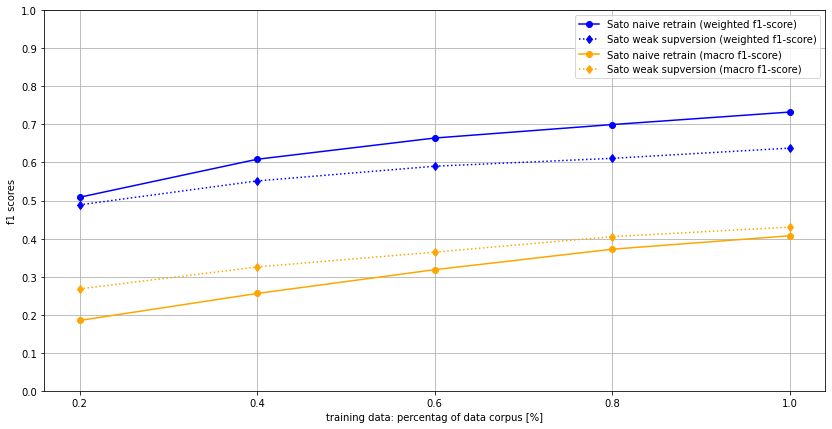

In [15]:
import os
from os.path import join
from dotenv import load_dotenv
load_dotenv(override=True)
import json
import numpy as np
import matplotlib.pyplot as plt


random_state = 2
percentages = np.around(np.arange(0.2,1.2,0.2), 2)
avg = "weighted"

precisions = []
recalls = []
f1_scores = []
f1_scores_weighted = []
f1_scores_macro = []

for percentage in percentages:
    with open(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], f"CRF+LDA_eval_eval_labeled{percentage}_{100.0-20.0-percentage}_test20.0_{random_state}", "outputs", f"classification_report_CRF+LDA_retrain_labeled{percentage}_{100.0-20.0-percentage}_test20.0_{random_state}_train100.pt.json")) as f:
        class_report = json.load(f)
    precisions.append(class_report[f"{avg} avg"]["precision"])
    recalls.append(class_report[f"{avg} avg"]["recall"])
    f1_scores.append(class_report[f"{avg} avg"]["f1-score"])
    f1_scores_weighted.append(class_report[f"weighted avg"]["f1-score"])
    f1_scores_macro.append(class_report[f"macro avg"]["f1-score"])
    
precisions_medl = []
recalls_medl = []
f1_scores_medl = []
f1_scores_medl_weighted = []
f1_scores_medl_macro = []

for percentage in percentages:
    with open(join(os.environ["SATO_DIR"], "results", "CRF_log", os.environ["TYPENAME"], f"CRF+LDA_eval_eval_embclus_all_combined_maj_labeled{percentage}_{100.0-20.0-percentage}_test20.0_{random_state}", "outputs", f"classification_report_CRF+LDA_retrain_embclus_all_combined_maj_labeled{percentage}_{100.0-20.0-percentage}_test20.0_{random_state}_train100.pt.json")) as f:
        class_report = json.load(f)
    precisions_medl.append(class_report[f"{avg} avg"]["precision"])
    recalls_medl.append(class_report[f"{avg} avg"]["recall"])
    f1_scores_medl.append(class_report[f"{avg} avg"]["f1-score"])
    f1_scores_medl_weighted.append(class_report[f"weighted avg"]["f1-score"])
    f1_scores_medl_macro.append(class_report[f"macro avg"]["f1-score"])
    
    
plt.figure(figsize=(14,7))
#plt.plot(percentages, precisions, marker="o", color="green",  label="Sato naive retrain (precision)")
#plt.plot(percentages, recalls, marker="o",color="orange", label="Sato naive retrain (recall)")
plt.plot(percentages, f1_scores_weighted, marker="o", color="blue", label="Sato naive retrain (weighted f1-score)")
plt.plot(percentages, f1_scores_medl_weighted, marker="d", color="blue", linestyle="dotted", label="Sato weak supversion (weighted f1-score)")
plt.plot(percentages, f1_scores_macro, marker="o", color="orange", label="Sato naive retrain (macro f1-score)")
plt.plot(percentages, f1_scores_medl_macro, marker="d", color="orange", linestyle="dotted", label="Sato weak supversion (macro f1-score)")
#plt.plot(percentages, precisions_medl, marker="d", color="green",  label="Sato weak supervision (precision)")
#plt.plot(percentages, recalls_medl, marker="d",color="orange", label="Sato weak supervision (recall)")


plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(percentages)
plt.grid()
plt.legend()
plt.title(f"")
plt.xlabel("training data: percentag of data corpus [%]")
plt.ylabel(f"f1 scores")
plt.show()